# Inteligenta Artificiala - Laboratorul 4
# Modelul bag-of-words. Normalizarea datelor. 
# Mașini cu vectori suport (SVM).

### Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.metrics import f1_score
from sklearn.svm import SVC

# 1. Normalizarea datelor

## 1.1. Standardizarea

### Toy data

In [ ]:
x_train = np.array([[1, -1, 2], [2, 0, 0], [0, 1, -1]], dtype=np.float64)
x_test = np.array([[-1, 1, 0]], dtype=np.float64)

In [ ]:
x_train

array([[ 1., -1.,  2.],
       [ 2.,  0.,  0.],
       [ 0.,  1., -1.]])

### Initializarea clasei `StandardScaler` si calcularea statisticilor
> `StandardScaler` docs [aici](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).

In [ ]:
scaler = preprocessing.StandardScaler()  # Init-ul clasei
scaler.fit(x_train)  # Calculul statisticilor

StandardScaler()

### Accesarea statisticilor calculate

In [ ]:
print(f"Media datelor: {scaler.mean_}")
print(f"Deviatia standard a datelor: {scaler.scale_}")

Media datelor: [1.         0.         0.33333333]
Deviatia standard a datelor: [0.81649658 0.81649658 1.24721913]


### Standardizarea datelor
> TODO: Foloseste doar `numpy` pentru a face acelasi lucru.

In [ ]:
scaled_x_train = scaler.transform(x_train)
scaled_x_test = scaler.transform(x_test)

print(f"Datele de antrenare standardizate sunt:\n\n {scaled_x_train}")
print(f"\nDatele de testare standardizate sunt:\n\n {scaled_x_test}")

Datele de antrenare standardizate sunt:

 [[ 0.         -1.22474487  1.33630621]
 [ 1.22474487  0.         -0.26726124]
 [-1.22474487  1.22474487 -1.06904497]]

Datele de testare standardizate sunt:

 [[-2.44948974  1.22474487 -0.26726124]]


## 1.2. Normalizarea L1. Normalizarea L2
Puteti folosi clasa `Normalizer`([docs](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.Normalizer.html#sklearn.preprocessing.Normalizer)) sau direct metoda `normalize` ([docs](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.normalize.html#sklearn.preprocessing.normalize)).

In [ ]:
# input: matrice(N, C)
# Pasul 1: Calculeaza norma L1 sau L2 pentru fiecare vector din input
# Pasul 2: Imparte fiecare vector din input la norma lui
# Hint: Tine cont de parametrul `axis`.

# 2. Mașini cu vectori suport
Vom folosi clasa `SVC` ([docs](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html?highlight=svc#sklearn.svm.SVC)) disponibila in libraria `sklearn`.

## 2.1. Toy Example

### Get data

In [ ]:
!wget https://fmi-unibuc-ia.github.io/ia/Data/Lab%205%20-%20toy%20example%20-%20SVM.zip
!unzip Lab\ 5\ -\ toy\ example\ -\ SVM.zip -d ./

--2022-03-11 07:47:32--  https://fmi-unibuc-ia.github.io/ia/Data/Lab%205%20-%20toy%20example%20-%20SVM.zip
Resolving fmi-unibuc-ia.github.io (fmi-unibuc-ia.github.io)... 185.199.108.153, 185.199.109.153, 185.199.110.153, ...
Connecting to fmi-unibuc-ia.github.io (fmi-unibuc-ia.github.io)|185.199.108.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 34422 (34K) [application/zip]
Saving to: ‘Lab 5 - toy example - SVM.zip’

Lab 5 - toy example 100%[===================>]  33.62K  --.-KB/s    in 0.001s  

2022-03-11 07:47:32 (22.3 MB/s) - ‘Lab 5 - toy example - SVM.zip’ saved [34422/34422]

Archive:  Lab 5 - toy example - SVM.zip
  inflating: ./data/svm_train_data.npy  
  inflating: ./data/svm_train_labels.npy  
  inflating: ./Lab 5 - toy example - SVM.ipynb  


### Helper functions

In [ ]:
def show_data_points(data, labels, show=True):
    for label in np.unique(labels):
        idx = labels == label
        plt.scatter(data[idx][:, 0], data[idx][:, 1], label=f"Class {int(label)}")
    
    if show:
        plt.legend()
        plt.show()

In [ ]:
def fit_linear_svm(data, labels, c_value):
    model = SVC(C=c_value, kernel="linear")  # Define the model
    model.fit(data, labels)  # Train the model
    
    return model

In [ ]:
def show_svm_results(svm_model):
    X = np.linspace(-1, 1, 1000)
    Y = -(X * svm_model.coef_[0, 0] + svm_model.intercept_) / svm_model.coef_[0, 1]

    # Get plotting data
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = svm_model.decision_function(xy).reshape(XX.shape)

    # Plot decision boundary and margins
    ax.contour(
        XX, YY, Z,
        colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--']
    )
    # Plot support vectors
    ax.scatter(
        svm_model.support_vectors_[:, 0], svm_model.support_vectors_[:, 1],
        s=100, linewidth=1, facecolors='none', edgecolors='k',
        label="Support vectors"
    )        

    plt.plot(X, Y)
    plt.legend(loc='upper left')
    plt.title(f"SVM model, C = {svm_model.C}")
    plt.show()

### Incarcarea datelor

In [ ]:
training_data = np.load('data/svm_train_data.npy')
training_labels = np.load('data/svm_train_labels.npy')

### Vizualizarea datelor

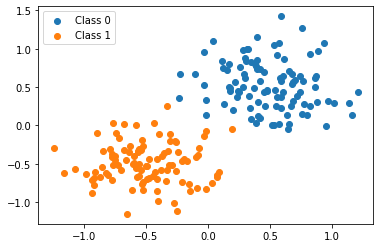

In [ ]:
show_data_points(training_data, training_labels)

### Vizualizarea efectului parametrului C

In [ ]:
new_point = np.array([-0.5, 1.])
new_point = new_point[None, :]
new_point_label = np.array([1])

In [ ]:
training_data = np.concatenate((training_data, new_point))
training_labels = np.concatenate((training_labels, new_point_label))

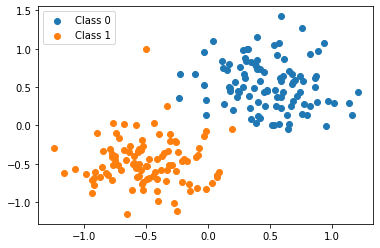

In [ ]:
show_data_points(training_data, training_labels)

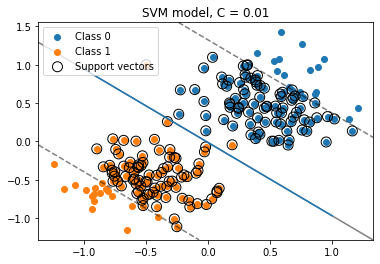

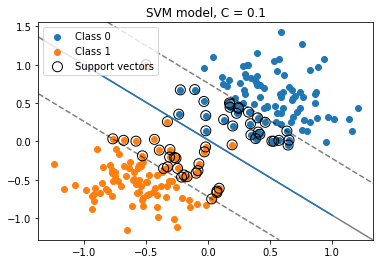

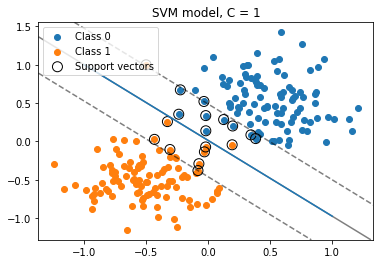

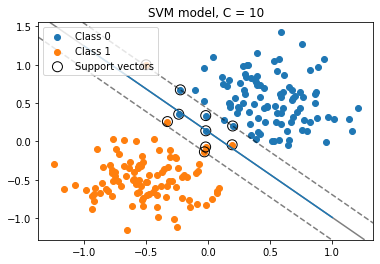

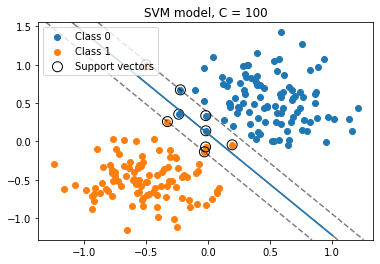

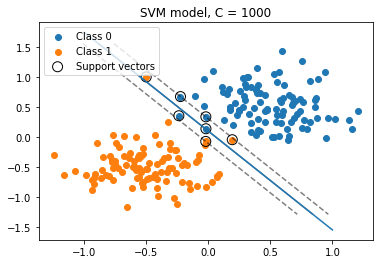

In [ ]:
for C_param in [0.01, 0.1, 1, 10, 100, 1000]:
    svm_model = fit_linear_svm(training_data, training_labels, C_param)

    show_data_points(training_data, training_labels, show=False)
    show_svm_results(svm_model)

# Exercitii

In [ ]:
!wget https://fmi-unibuc-ia.github.io/ia/Data/data_lab5.zip
!unzip data_lab5.zip -d ./

--2022-03-11 07:47:37--  https://fmi-unibuc-ia.github.io/ia/Data/data_lab5.zip
Resolving fmi-unibuc-ia.github.io (fmi-unibuc-ia.github.io)... 185.199.108.153, 185.199.109.153, 185.199.110.153, ...
Connecting to fmi-unibuc-ia.github.io (fmi-unibuc-ia.github.io)|185.199.108.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 503740 (492K) [application/zip]
Saving to: ‘data_lab5.zip’

data_lab5.zip       100%[===================>] 491.93K  --.-KB/s    in 0.03s   

2022-03-11 07:47:37 (19.2 MB/s) - ‘data_lab5.zip’ saved [503740/503740]

Archive:  data_lab5.zip
  inflating: ./data/test_labels.npy  
  inflating: ./data/test_sentences.npy  
  inflating: ./data/training_labels.npy  
  inflating: ./data/training_sentences.npy  


### Citirea datelor

In [ ]:
train_sentences = np.load("data/training_sentences.npy", allow_pickle=True)
train_labels = np.load("data/training_labels.npy")

test_sentences = np.load("data/test_sentences.npy", allow_pickle=True)
test_labels = np.load("data/test_labels.npy")

### Crearea clasei BagOfWord

In [ ]:
class BagOfWords:
    def __init__(self) -> None:
        self.dictionary = {}
    
    def build_vocabulary(self, data):
        for sentence in data:
            for word in sentence:
                if word not in self.dictionary.keys():
                    self.dictionary[word] = len(self.dictionary)
    
    def get_features(self, data):
        features = np.zeros(shape=(len(data), len(self.dictionary)))

        for i, sentence in enumerate(data):
            for word in sentence:
                features[i, self.dictionary[word]] += 1
        
        return features

In [ ]:
bow = BagOfWords()  # Init
bow.build_vocabulary(train_sentences)

In [ ]:
len(bow.dictionary)

9522

In [ ]:
bow_train_features = bow.get_features(train_sentences)

In [ ]:
bow_train_features

array([[1., 1., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
train_sentences[1]

['I', 'HAVE', 'A', 'DATE', 'ON', 'SUNDAY', 'WITH', 'WILL']